In [1]:
import json
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt 
from pyvis.network import Network
from Modules.NetVisualizer.net_visualizer import *
from Modules.NetBuilder.net_builder import net_build
from Utils.scripts import *
import pandas as pd
from random import randint
import seaborn as sns
from wordcloud import WordCloud
import collections
import numpy as np
import plotly.express as px
import math
from Utils import scraper_script

# Data Analysis
Uses DaScra output of Disability dataset

## Reading/Cleaning Data

In [52]:
data_to_read='./OutputFiles/DisabilityDataset/whole_Disability_dascra_output.xlsx'

stories_df= pd.read_excel(data_to_read,
              dtype={
                  'AdditionalTags': str, 'ArchiveWarning': str,
                  'Author': str, 'Bookmarks': str,
                  'Category': str, 'Chapters': str,
                  'Characters': str, 'Comments': str,
                  'Fandom': str, 'Hits': int,
                  'Kudos': object, 'Language': str,
                  'Rating': str, 'Relationship': str,
                  'Series': str, 'Part': float,
                  'SourceURL': str, 'Title': str,
                  'Updated': str, 'Words': str,
              }) 


stories_df=stories_df.drop_duplicates()
# stories_df=stories_df.loc[stories_df.Language=='English']
# stories_df=stories_df.drop(columns=['Comments','Hits','Kudos','SourceURL','ArchiveWarning','Bookmarks','Category','Characters','Language','Rating','Relationship','Updated','Words',])
stories_df=stories_df.drop(columns=['Comments','Hits','Kudos','SourceURL','ArchiveWarning','Bookmarks','Category','Characters','Language','Rating','Relationship','Words',])
# stories_df=stories_df[['Title', 'AdditionalTags']]


In [53]:
stories_df['Title']=stories_df['Title'].apply(lambda x: x.strip())

stories_df['AdditionalTags']=stories_df['AdditionalTags'].apply(lambda x: [item.strip() for item in str(x).split(',')])
all_additionaltags=[]
stories_df["AdditionalTags"].apply(lambda x: all_additionaltags.extend(x))
len(all_additionaltags)


stories_df['StoryTagCount']=stories_df["AdditionalTags"].apply(lambda x: len(x))

## Visualizations


### Story's tags count Histogram


In [4]:
Q1 = stories_df.StoryTagCount.quantile(0.25)
Q3 = stories_df.StoryTagCount.quantile(0.75)
IQR = Q3 - Q1
# Freedman Diaconis Estimator for number of bins
temp = (stories_df.StoryTagCount.max() - stories_df.StoryTagCount.min())
bin_width= 2*IQR*temp**(-1/3)
nbins = math.ceil(temp / bin_width)

fig = px.histogram(stories_df, x="StoryTagCount", nbins=nbins)
fig.update_layout(bargap=0.2)
fig.show()

In [5]:
a= collections.Counter(all_additionaltags)
print(len(a))
[a.pop(key) for key in a.copy() if a[key]<=1000].__len__()
print(len(a))

177777
47


### Individual Tags Count


In [6]:
fig = px.bar(x=list(a.keys()), y=list(a.values()))
# fig.
fig.update_layout(xaxis={'categoryorder':'total descending'}) 
fig.show()

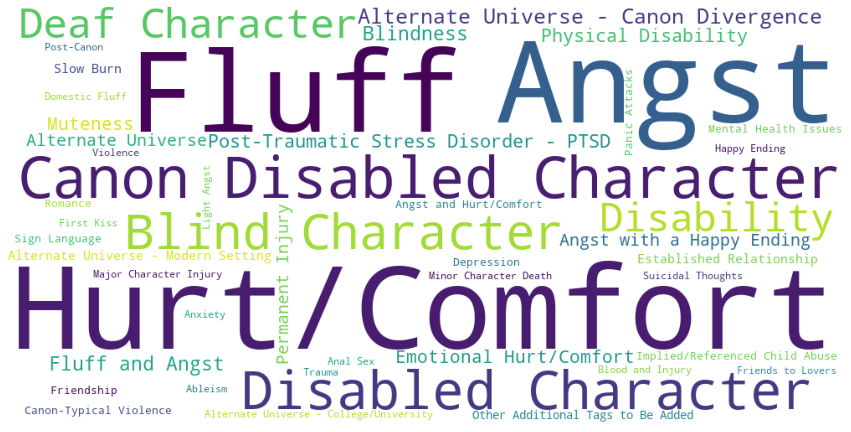

In [7]:
wordcloud = WordCloud(width = 1000, height = 500,background_color="white").generate_from_frequencies(a)

plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordcloud)

# Disability RATAS

In [33]:
disability_ratas = read_json_rata('./OutputFiles/disability_rata_database/disability_rata_current.json')
# disability_ratas = read_json_rata('./OutputFiles/full_disability_rata_current.json')
disability_ratas =  nx.DiGraph(disability_ratas[0])

In [34]:
stories_df["DisabilityTags"]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if disability_ratas.has_node(item)])
stories_df["DisabilityTagsCount"]=stories_df.DisabilityTags.apply(len)
 
stories_df["NonDisabilityTags"]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if not disability_ratas.has_node(item)])
stories_df["NonDisabilityTagsCount"]=stories_df.NonDisabilityTags.apply(len)


stories_df["DisabilityCanocicalTags"]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if disability_ratas.has_node(item) and disability_ratas.nodes[item]['type']=='canonical_tag'])
stories_df["DisabilityCanonicalTagsCount"]=stories_df.DisabilityCanocicalTags.apply(len)
stories_df["DisabilitySynTags"]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if disability_ratas.has_node(item) and disability_ratas.nodes[item]['type']=='synned_tag'])
stories_df["DisabilitySynTagsCount"]=stories_df.DisabilitySynTags.apply(len)


In [42]:
stories_df.loc[stories_df.DisabilityTagsCount==0,"Title"][774]

'alpas'

In [1]:
disability_ratas.nodes['Deaf Levi Ackerman']
# disability_ratas.nodes['Disability']

NameError: name 'disability_ratas' is not defined

In [36]:

a=[]
stories_df.loc[stories_df.DisabilityTagsCount==0,"AdditionalTags"].apply(lambda x: a.extend(x))
# stories_df.loc[stories_df.DisabilityTagsCount==0]
len(set(a))

44064

In [59]:
stories_df.loc[stories_df.DisabilityTagsCount==0,['Title','Updated']][:150]

,Title,Updated
50,And If My Lover Will Not Hear It,27 Apr 2022
774,alpas,18 Apr 2022
1446,【法加】发生在情人节的野外,04 Apr 2022
2554,Comfortable Silence,07 Mar 2022
3638,Wonder,06 Feb 2022
...,...,...
39179,Language Barrier,12 Jan 2016
39333,Sign language,26 Dec 2015
39495,The Match and the Rock,04 Dec 2015
39522,Chasing Freedom,30 Nov 2015


In [14]:
f=[item for item in a if item in z]
f

['reference to canon disability']

## Disability RATAS TAgs

In [35]:
fig = px.histogram(stories_df.DisabilityTagsCount,x='DisabilityTagsCount')
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
print(len(all_additionaltags))

In [ ]:
add_tags= list(set(all_additionaltags))
disability_tags=[tag for tag in add_tags if disability_ratas.has_node(tag)]
len(disability_tags)

In [ ]:
net_visualize(disability_ratas,False)

In [ ]:
G= disability_ratas.copy()

for item in G.nodes:
    G.nodes[item]['color']='#2E86C1' if item in disability_tags else  '#F39C12'

In [ ]:
net_visualize(G,False, True)


In [ ]:
# scraper_script.tagscra_list(["Deaf!Dean"],of='disability_rata_current')

# AAA

In [4]:
disability_ratas = read_json_rata('./OutputFiles/disability_rata_database/disability_rata_2018.json')
# disability_ratas = read_json_rata('./OutputFiles/full_disability_rata_current.json')

disability_ratas =  nx.DiGraph(disability_ratas[0])
# net_visualize(disability_ratas,False,True)

a= list(disability_ratas.nodes)
a.remove("Disability")

scraper_script.tagscra_list(a,of='syn_disability_rata_2018',tags_per_iteration=35,av='2018')

268

======================================== BATCH ========================================
========================================1/8========================================

=============== Waiting 4 minutes: Tue May  3 13:46:03 2022 ===============

======================================== BATCH ========================================
========================================2/8========================================

=============== Waiting 4 minutes: Tue May  3 13:50:03 2022 ===============

======================================== BATCH ========================================
========================================3/8========================================

=============== Waiting 4 minutes: Tue May  3 13:54:03 2022 ===============

======================================== BATCH ========================================
========================================4/8========================================

=============== Waiting 4 minutes: Tue May  3 13:58:03 2022 ============

In [5]:
# with open('./OutputFiles/full_disability_rata_current.json', 'r', encoding='utf-8') as f:
with open('./OutputFiles/syn_disability_rata_2013.json', 'r', encoding='utf-8') as f:
        # Load the JSON
    current_data = json.load(f)
f.close()

In [9]:
disability_ratas = read_json_rata('./OutputFiles/syn_disability_rata_2013.json')
disability_ratas =  nx.DiGraph(disability_ratas[0])

TypeError: 'NoneType' object is not subscriptable

In [8]:
net_visualize(disability_ratas,False,True)


<class 'pyvis.network.Network'> |N|=4155 |E|=4,751

# Free form tags

In [30]:
# disability_ratas = read_json_rata('./OutputFiles/disability_rata_database/disability_rata_current.json')
disability_ratas = read_json_rata('./OutputFiles/full_disability_rata_current.json')

disability_ratas =  nx.DiGraph(disability_ratas[0])

her


In [38]:
z= open('./freeformtags.json').read()
z=z.split(',')
z=[item for item in z if not item in disability_ratas.nodes]
for tag in z:
    disability_ratas.add_node(tag) if not disability_ratas.has_node(tag) else None
    disability_ratas.nodes[tag]['group']="freeform_tag"
    disability_ratas.nodes[tag]['type']="freeform_tag"
    disability_ratas.nodes[tag]['title']=tag
    disability_ratas.nodes[tag]['color']='#5D6D7E'

In [54]:
stories_df["DisabilityTags"]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if disability_ratas.has_node(item)])
stories_df["DisabilityTagsCount"]=stories_df.DisabilityTags.apply(len)

stories_df["NonDisabilityTags"]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if not disability_ratas.has_node(item)])
stories_df["NonDisabilityTagsCount"]=stories_df.NonDisabilityTags.apply(len)


stories_df["DisabilityCanocicalTags"]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if disability_ratas.has_node(item) and disability_ratas.nodes[item]['type']=='canonical_tag'])
stories_df["DisabilityCanonicalTagsCount"]=stories_df.DisabilityCanocicalTags.apply(len)
stories_df["DisabilitySynTags"]=stories_df.AdditionalTags.apply(lambda x : [item for item in x if disability_ratas.has_node(item) and disability_ratas.nodes[item]['type']=='synned_tag'])
stories_df["DisabilitySynTagsCount"]=stories_df.DisabilitySynTags.apply(len)
fig = px.histogram(stories_df.DisabilityTagsCount,x='DisabilityTagsCount')
fig.update_layout(bargap=0.2)
fig.show()

In [25]:
"except the mutism that's the entire fic" in disability_ratas.nodes['Muteness']

False

In [ ]:
# scraper_script.tagscra_list(b,of='disabilities_freeformtags',tags_per_iteration=45)
# scraper_script.tagscra_list(b,of='disabilities_freeformtags',tags_per_iteration=45)

In [51]:
scraper_script.tagscra_list(["Deaf Levi Ackerman"],of='mamamamamamamma',tags_per_iteration=45)


1

======================================== BATCH ========================================
========================================1/1========================================
Reading existing JSON :./OutputFiles/mamamamamamamma.json
================= 1/1 =================
================= MINING TAG: Deaf Levi Ackerman =================

=============== Waiting 4 minutes: Mon May  2 11:41:43 2022 ===============
